In [ ]:
!pip install kaggle
import os
import json
import pandas as pd

**DATA COLLECTION**

In [ ]:
from zipfile import ZipFile
kaggle_dictionary=json.load(open('/kaggle (1).json'))
os.environ['kaggle_username']=kaggle_dictionary['username']
os.environ['kaggle_key']=kaggle_dictionary['key']
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip','r') as zip_ref:
  zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 35% 9.00M/25.7M [00:00<00:00, 80.4MB/s]
100% 25.7M/25.7M [00:00<00:00, 139MB/s] 


In [ ]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   sample_data


**EDA(textual and numerical insights)**

In [ ]:
data=pd.read_csv('/content/IMDB Dataset.csv')
#DATA SET SUMMARY
print(f"first few rows: {data.head()}")
print(f"Dataset shape: {data.shape}")
print(f"columns: {data.columns.tolist()}")
print(f"data types: {data.dtypes}")

first few rows:                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Dataset shape: (50000, 2)
columns: ['review', 'sentiment']
data types: review       object
sentiment    object
dtype: object


In [ ]:
#SENTIMENT DISTRIBUTION
sentiment_counts=data['sentiment'].value_counts()
sentiment_percentage=(sentiment_counts/len(data))*100
print("sentiment counts:\n",sentiment_counts)
print("sentiment percentage:\n",sentiment_percentage)


sentiment counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64
sentiment percentage:
 sentiment
positive    50.0
negative    50.0
Name: count, dtype: float64


In [ ]:
#REVIEW ANALYSIS
#(a)review length
data['review_length']=data['review'].apply(len)
print(data['review_length'].describe())
#longest and shortest review
longest_review=data.loc[data['review_length'].idxmax()]
shortest_review=data.loc[data['review_length'].idxmin()]
print("\nlongest review:\n",longest_review['review'])
print("\nshortest review:\n",shortest_review['review'])



count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

longest review:
 Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! Afte

In [ ]:
#top 10 most common words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(data['review'])
word_counts = dict(zip(vectorizer.get_feature_names_out(), word_matrix.sum(axis=0).A1))

sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Most Frequent Words:\n", sorted_words)


Top 10 Most Frequent Words:
 [('br', 201951), ('movie', 87971), ('film', 79705), ('like', 40172), ('just', 35184), ('good', 29753), ('time', 25110), ('story', 23119), ('really', 23094), ('bad', 18473)]


In [ ]:
#missing values
print("Missing Values in Each Column:\n", data.isnull().sum())

Missing Values in Each Column:
 review       0
sentiment    0
dtype: int64


**EDA(visualization)**

<ipython-input-16-e0dc3e050224>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


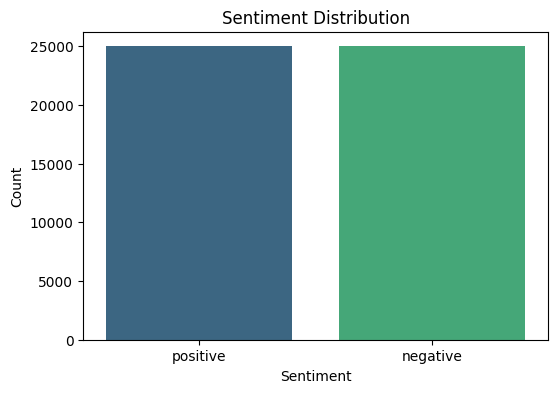

In [ ]:
data=pd.read_csv('/content/IMDB Dataset.csv')
#sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(data, sentiment_column):
    counts = data[sentiment_column].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

plot_sentiment_distribution(data, "sentiment")

<ipython-input-18-3f80d3a80a4c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


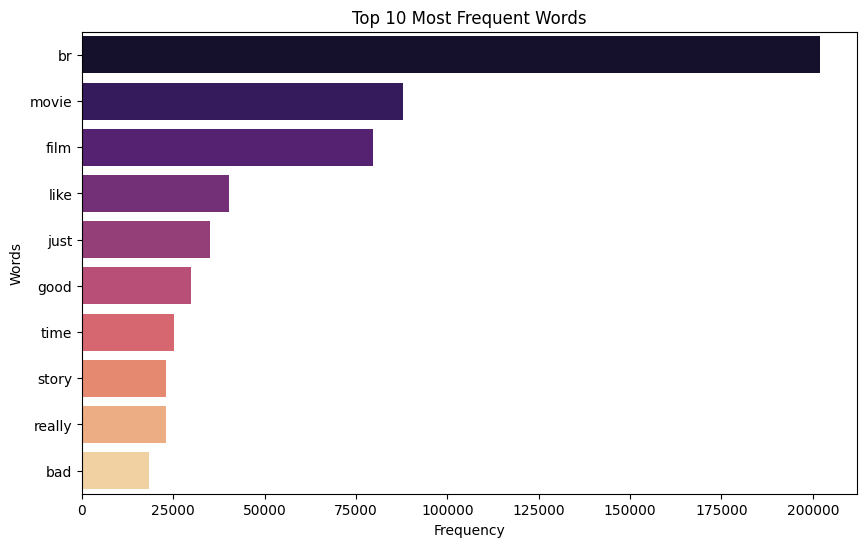

In [ ]:
#10 most frequent words

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def plot_word_frequencies(data, text_column, top_n=10):
    # Combine all reviews into one string
    all_reviews = " ".join(data[text_column])

    # Tokenize and remove stop words using CountVectorizer
    vectorizer = CountVectorizer(stop_words="english")
    word_matrix = vectorizer.fit_transform([all_reviews])

    # Count the frequencies of words
    word_counts = dict(zip(vectorizer.get_feature_names_out(), word_matrix.toarray().sum(axis=0)))
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Plot the top N words
    words, counts = zip(*sorted_word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="magma")
    plt.title(f"Top {top_n} Most Frequent Words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Call the function
plot_word_frequencies(data, "review")

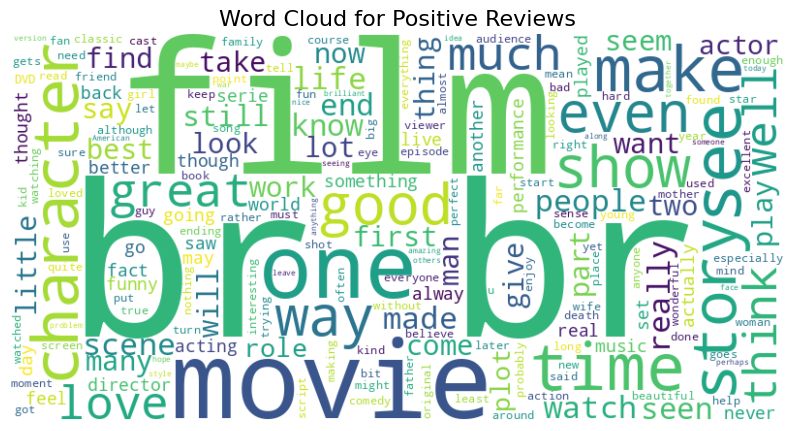

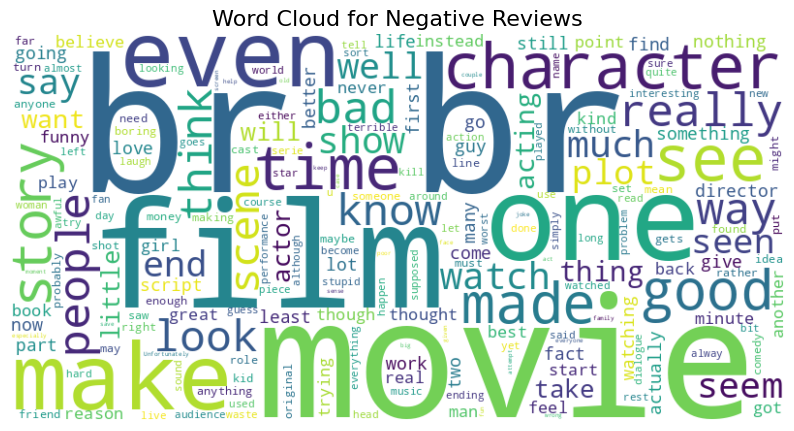

In [ ]:
#word cloud
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for positive and negative reviews
positive_reviews = " ".join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(data[data['sentiment'] == 'negative']['review'])

generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")

In [ ]:
import re
import nltk
import nltk
nltk.download('punkt_tab') #Download the punkt_tab data package

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download NLTK resources (only needed the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove HTML tags, URLs, and special characters
    text = re.sub(r'<.*?>', '', text)       # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'review' column
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Check the first few rows of the cleaned reviews
print(data[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  
